<a href="https://colab.research.google.com/github/igolynker/NGG605/blob/main/HW_20230911.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PennNGG/Quantitative-Neuroscience/blob/master/Probability%20Distributions/Python/Binomial.ipynb)

# Definition

The binomial distribution is a discrete probability distribution that describes the probability of obtaining exactly k successes out of n Bernoulli trials, which are individual binary outcomes that each have a success probability of p. For example, if you flip a coin 10 times, what is the probability that it will come up heads 0, 1, 2, ... 10 times?

Mathematically, this distribution defines the probability of obtaining *k* successes in *n* trials given a constant probability of success *p* on each trial, which is defined as:

[1] $P(X=k\: successes)=\left ( \frac{n}{k} \right )p^{k}\left ( 1-p \right )^{n-k}$

for *k* = 0, 1, 2, ... , *n*, and where

$\left ( \frac{n}{k} \right )=\frac{n!}{k!\left ( n-k \right )!}$

 is called the "binomial coefficient" and is pronounced "[n-choose-k](https://www.hackmath.net/en/calculator/n-choose-k)"

# Getting Started with Code


Matlab code is found in the [NGG Statistics GitHub Repository](https://github.com/PennNGG/Statistics.git) under "Probability Distributions/Binomial.m".

Python code is included below. First run the code cell just below to make sure all of the required Python modules are loaded, then you can run the other cell(s).

In [2]:
import numpy as np
import random as rnd
import collections
import matplotlib.pyplot as plt
import time
import scipy.stats as st
import math

from scipy.stats import bernoulli, binom, poisson, chi2
from IPython.display import clear_output
from operator import itemgetter
from statsmodels.stats import proportion
from array import array
from numpy import matlib


# Tutorial

In [3]:
# Choose some values for the parameters n and p
p = 0.7
n = 1000

# Generate random picks. Note that this is as if we generated Bernoulli trials
#   as above, but then just counted the successes in each "experiment"
num_successes = binom.rvs(n,p) # uses the "random variates" method (rvs) of binom

# Print out the results
print(f'{num_successes} successes out of {n} trials, simulated p = {p:.4f}, empirical p = {num_successes/n:.4f}')

709 successes out of 1000 trials, simulated p = 0.7000, empirical p = 0.7090


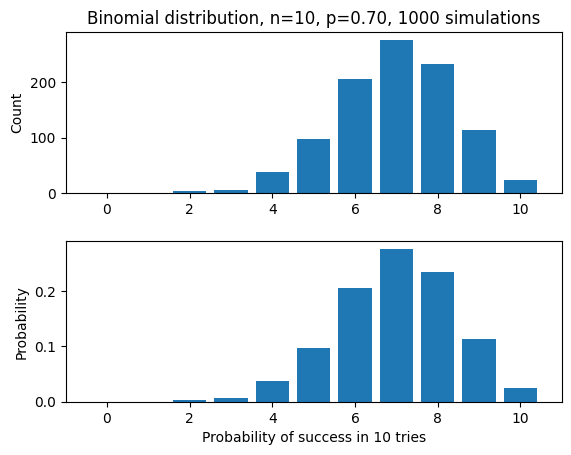

In [4]:
# The full probability distribution describes the probabilty of obtaining each
#   possible number of successes (k), given n and p. If we set n=10, the the
#   possible values of k are 0, 1, ..., 10. Now we use binom.rvs to simulate
#   many different picks to get a full distribution
p = 0.7
n = 10                      # number of "trials" per "experiment"
num_experiments = 1000;     # number of "experiments"
outcomes = binom.rvs(n,p,size=num_experiments)

# Show a bar plot (histogram) of all of the possible outcomes
counts = collections.Counter(outcomes)
plt.subplot(211)
plt.bar(counts.keys(), counts.values())
plt.xlim([-1, n+1])
plt.title(f'Binomial distribution, n={n}, p={p:.2f}, {num_experiments} simulations')
plt.ylabel('Count')

# Show a normalized version that is a pdf. Here counts (the x-axis of the histogram)
#   is a DISCRETE variable, so we just have to add up the values
normalized_counts = {k: v / total for total in (sum(counts.values()),) for k, v in counts.items()}
plt.subplot(212)
plt.bar(normalized_counts.keys(), normalized_counts.values())
plt.xlim([-1, n+1])
plt.xlabel(f'Probability of success in {n} tries')
plt.ylabel('Probability')
plt.subplots_adjust(hspace=0.3)

In [ ]:
# Now let's make a fun animation showing different values of p and N.
#   Note that, of course, the more picks you make of the random variable
#   (higher N), the more closely the outcomes (the "samples") match the true
#   distribution.
n=10
xs = range(0, n)
f = plt.figure()
for p in np.arange(0, 1, 0.1):
    for N in np.round(np.logspace(1,5,10)):

        # Get the true binomial pdf
        Y = binom.pmf(xs,n,p)

        # Get the random picks, make histogram and normalize
        counts = collections.Counter(binom.rvs(n,p,size=int(N)))
        normalized_counts = {k: v / total for total in (sum(counts.values()),) for k, v in counts.items()}

        # Show both
        plt.bar(normalized_counts.keys(), normalized_counts.values())
        plt.plot(xs, Y, 'ro-', linewidth=2, markersize=10)

        # Labels, etc
        plt.title(f'p={p:.1f}, n={n}, N={N:.2f}')
        plt.xlabel(f'Number of successes in {n} tries')
        plt.ylabel('Probability')
        plt.axis([-1, n+1, 0, 0.45])
        plt.legend(('Theoretical', 'Simulated'))
        plt.show()

        # Wait
        time.sleep(0.1)

        # Clear for next plot
        clear_output(wait=True)



KeyboardInterrupt: ignored

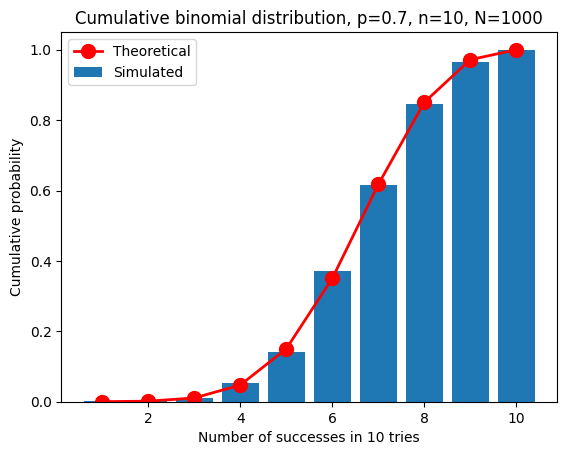

In [4]:
# The cumulative distribution function is just the proability of obtaining an
#   outcome that is equal to OR LESS THAN a particular value.
p = 0.7
n = 10                      # number of "trials" per "experiment"
num_experiments = 1000;     # number of "experiments"
outcomes = binom.rvs(n,p,size=num_experiments)

# Make histogram
counts = collections.Counter(outcomes)

# Unzip keys from values in a sorted order
keys, values = zip(*sorted(counts.items(), key=itemgetter(0)))

# Compute the cumulative sum of the counts normalized by the total counts (so
#   it is a probability function and not just a histogram -- note that the final
#   value in the cdf should equal 1 because every value should be equal to or
#   less than that value).
total = sum(values)
cumulative_ps = [x/total for x in np.cumsum(values)]

# Plot as a bar graph
plt.bar(keys, cumulative_ps)

# Compare it to the real binomial cumulative distribution, which we find
#   using binom.cdf
Y = binom.cdf(keys,n,p)
plt.plot(keys, Y, 'ro-', linewidth=2, markersize=10)

# Labels, etc
plt.title(f'Cumulative binomial distribution, p={p:.1f}, n={n}, N={num_experiments}')
plt.xlabel(f'Number of successes in {n} tries')
plt.ylabel('Cumulative probability')
plt.legend(('Theoretical', 'Simulated'))

# Neuroscience Example: Quantal Release

From: Johnson, E.W., and Wernig, A. (1971). [The binomial nature of transmitter release at the crayfish neuromuscular junction](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1331610/). J Physiol 218, 757-767.

Classic studies by [Bernard Katz and colleagues](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2151334/) indicated that chemical neurotransmitters are released from presynaptic nerve terminals in discrete quanta, or packets, with a relatively constant release probability. A straightforward implication of this idea is that the release statistics (i.e., the distribution of the number of quanta that are actually released in response to a given event like an action potential reaching the presynaptic nerve terminal) should follow a binomial distribution. As stated by Johnson and Wernig:

"If the average probability of release is constant, then it follows from the hypothesis that the relative frequency of 0, 1, 2, 3, . . . quantal releases in a series of trials is given by the successive terms in the binomial expansion $(p + q)^n$, where *q*=1–*p* is the average probability that a quantum will not be released. In a given trial, the probability that *x* quanta will be released (*px*) is given by the binomial term" [i.e., Eq. 1, above, but substitute *x* for *k*].

In other words, if there are *n* available quanta in a presynaptic terminal, and each is released with probability *p*, then the number of quanta that are actually released should follow a binomial distribution with parameters *n* and *p*.

Answers to the exercises below will be found [here](https://github.com/PennNGG/Quantitative-Neuroscience/tree/master/Answers%20to%20Exercises/Python) after the due date.

## Exercise 1
Assume that there are 10 quanta available in a nerve terminal, and for a given release event each is released with a probability of 0.2. For one such event, what is the probability that 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, or 10 quanta will be released?

In [5]:
# Choose some values for the parameters n and p
p = 0.2 # probability of sucess
n = 10 # number of quanta available per experiment
k = [0,1,2,3,4,5,6,7,8,9,10] #make a list of 0 to 10 for quanta
Prob= [] # create an empty list for appending probabiloties for each quantal number
# for loop that goes from k=0 to k=10 and calculate the Binomial probability for each quantal release from 0 to 10
for i in range(0,10):
  k_cur = k[i]
  prob_cur = ((math.factorial(n))/(math.factorial(k_cur)* (math.factorial(n-k_cur)))) * (p**k_cur) * (1-p)**(n-k_cur)
  Prob.append(prob_cur)
  print("The probability of release for %d number of quanta is %0.7f" % (k_cur, prob_cur))





The probability of release for 0 number of quanta is 0.1073742
The probability of release for 1 number of quanta is 0.2684355
The probability of release for 2 number of quanta is 0.3019899
The probability of release for 3 number of quanta is 0.2013266
The probability of release for 4 number of quanta is 0.0880804
The probability of release for 5 number of quanta is 0.0264241
The probability of release for 6 number of quanta is 0.0055050
The probability of release for 7 number of quanta is 0.0007864
The probability of release for 8 number of quanta is 0.0000737
The probability of release for 9 number of quanta is 0.0000041


## Exercise 2
Let's say you know that a given nerve terminal contains exactly 14 quanta available for release. You have read in the literature that the release probability of these quanta is low, say 0.1. To assess whether this value is reasonable, you run a simple experiment: activate the nerve and measure the number of quanta that are released. The result is 8 quanta. What is the probability that you would get this result (8 quanta) if the true probability of release really was 0.1? What about if the true release probability was much higher; say, 0.7? What about for each decile of release probability (0.1, 0.2, ... 1.0)? Which value of release probability did you determine to be the most probable, given your measurement?

Note: here you are computing a likelihood function: a function describing how the value of the conditional probability *p*(*data* | *parameters*) changes when you hold your data fixed to the value(s) you measured and vary the value(s) of the parameter(s) of, in this case, the binomial distribution. Because you are varying the parameters and not the data, the values of the function are not expected to sum to one (e.g., you can have numerous parameters that have a very high probability of producing the given data) and thus this function is not a probability distribution (see [here](https://www.psychologicalscience.org/observer/bayes-for-beginners-probability-and-likelihood) for an extended discussion). The maximum value of this function is called the maximum likelihood.

In [6]:
p = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1] # vector of probability of sucess
n = 14 # number of quanta available per experiment
k = 8 #constant 8 quanta being released
Prob= [] # create an empty list for appending probabiloties for each probabilty
# for loop that goes from k=0 to k=10 and calculate the Binomial probability for each quantal release from 0 to 10
for i in range(0,10):
  p_cur = p[i]
  prob_cur = ((math.factorial(n))/(math.factorial(k)* (math.factorial(n-k)))) * (p_cur**k) * (1-p_cur)**(n-k)
  Prob.append(prob_cur)
  print("The probability of getting 8 quanta relased for probability of relase %0.1f number of quanta is %0.8f" % (p_cur, prob_cur))

The probability of getting 8 quanta relased for probability of relase 0.0 number of quanta is 0.00000000
The probability of getting 8 quanta relased for probability of relase 0.1 number of quanta is 0.00001596
The probability of getting 8 quanta relased for probability of relase 0.2 number of quanta is 0.00201528
The probability of getting 8 quanta relased for probability of relase 0.3 number of quanta is 0.02318001
The probability of getting 8 quanta relased for probability of relase 0.4 number of quanta is 0.09182116
The probability of getting 8 quanta relased for probability of relase 0.5 number of quanta is 0.18328857
The probability of getting 8 quanta relased for probability of relase 0.6 number of quanta is 0.20659761
The probability of getting 8 quanta relased for probability of relase 0.7 number of quanta is 0.12620227
The probability of getting 8 quanta relased for probability of relase 0.8 number of quanta is 0.03224447
The probability of getting 8 quanta relased for probabi

## Exercise 3

Not feeling convinced by your single experiment (good scientist!), you repeat it under identical conditions. This time you measure 5 quanta that were released. Your sample size has now doubled, to two measurements. You now want to take into account both measurements when you assess the likelihoods of different possible values of the underlying release probability. To do so, assume that the two measurements in this sample are independent of one another; that is, the value of each result had no bearing on the other. In this case, the total likelihood is simply the product of the likelihoods associated with each separate measurement. It is also typical to compute the logarithm of each likelihood and take their sum, which is often more convenient. What are the values of the total likelihood and total log-likelihood in this example, if we assume that the true release probability is 0.1?

Of course, knowing those values of the likelihood and log-likelihood is not particularly useful until you can compare them to the values computed for other possible values for the release probability, so you can determine which value of release probability is most likely, given the data. Therefore, compute the full likelihood and log-likelihood functions using deciles of release probability between 0 and 1. What is the maximum value? Can you improve your estimate by computing the functions at a higher resolution? How does the estimate improve as you increase the sample size?

The probability of getting 8 quanta relased for probability of relase 0.1 number of quanta is 0.00001596
The probability of getting 8 quanta relased for probability of relase 0.2 number of quanta is 0.00201528
The probability of getting 8 quanta relased for probability of relase 0.3 number of quanta is 0.02318001
The probability of getting 8 quanta relased for probability of relase 0.4 number of quanta is 0.09182116
The probability of getting 8 quanta relased for probability of relase 0.5 number of quanta is 0.18328857
The probability of getting 8 quanta relased for probability of relase 0.6 number of quanta is 0.20659761
The probability of getting 8 quanta relased for probability of relase 0.7 number of quanta is 0.12620227
The probability of getting 8 quanta relased for probability of relase 0.8 number of quanta is 0.03224447
The probability of getting 8 quanta relased for probability of relase 0.9 number of quanta is 0.00129269
The probability of getting 8 quanta relased for probabi

<ipython-input-7-eeeee8519577>:45: RuntimeWarning: divide by zero encountered in log
  Log_prob = np.log(Prob_array) #take the natural log from each elemnt in array "Prob"
<ipython-input-7-eeeee8519577>:46: RuntimeWarning: divide by zero encountered in log
  Log_prob2 = np.log(Prob2_array) #take the natural log from each elemnt in array "Prob2"


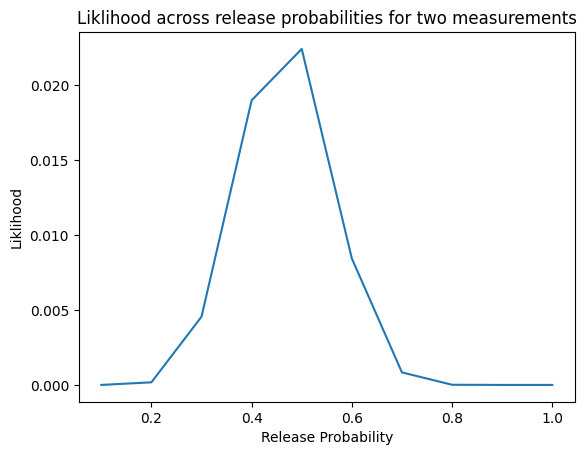

In [7]:
p = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1] # vector of probability of sucess
n = 14 # number of quanta available per experiment
k1 = 8 #constant 8 quanta being released
Prob= [] # create an empty list for appending probabiloties for each probability
# for loop that goes from p=0.0 to p=1 and calculate the Binomial probability for the fixed quantal relase of 8
for i in range(0,10):
  p_cur = p[i]
  prob_cur = ((math.factorial(n))/(math.factorial(k1)* (math.factorial(n-k1)))) * (p_cur**k1) * (1-p_cur)**(n-k1)
  Prob.append(prob_cur)
  print("The probability of getting 8 quanta relased for probability of relase %0.1f number of quanta is %0.8f" % (p_cur, prob_cur))
print("\n")

k2 = 5 #constant 5 quanta being released
# for loop that goes from p=0.0 to p=1 and calculate the Binomial probability for the fixed quantal relase of 5
Prob2= [] # create an empty list for appending probabiloties for each probability
# for loop that goes from p=0.0 to p=1 and calculate the Binomial probability for the fixed quantal relase of 5
for i in range(0,10):
  p_cur = p[i]
  prob_cur = ((math.factorial(n))/(math.factorial(k2)* (math.factorial(n-k2)))) * (p_cur**k2) * (1-p_cur)**(n-k2)
  Prob2.append(prob_cur)
  print("The probability of getting 5 quanta relased for probability of relase %0.1f number of quanta is %0.8f" % (p_cur, prob_cur))
print("\n")

# multiply both probability lists (prob of 8 release by prob of 5 release)
total_prob = list(np.multiply(Prob, Prob2))
# print(total_prob)
for i in range(0,10):
  print("The total likelihood given both independent measurments, both with probability of release  %0.1f is %0.8f" % (p[i], total_prob[i]))
print("\n")

#graph the results of likelihood over a range of p values
plt.plot(p,total_prob)
plt.xlabel('Release Probability')
plt.ylabel('Liklihood')
plt.title('Liklihood across release probabilities for two measurements')

# display the maximal value
max_value = max(total_prob)
print("the maximum value is %0.8f" % (max_value))
print("\n")

# take the natual log of each probability for the rlease of 5 and 8 on the list and sum both logs for each probability
Prob_array = array("f", Prob) #convert list to array to be able to take the log later
Prob2_array = array("f", Prob2) #convert list to array to take the log later
Log_prob = np.log(Prob_array) #take the natural log from each elemnt in array "Prob"
Log_prob2 = np.log(Prob2_array) #take the natural log from each elemnt in array "Prob2"
# print(Log_prob, Log_prob2)
Log_like_prob = np.add(Log_prob, Log_prob2) #add each element on both log lists to it's corresponding element
# print(Log_like_prob)
# print log liklehood for each probability using log and addition of each independent measurment
for i in range(0,10):
  print("The total log likelihood given both independent measurments, both with probability of release  %0.1f is %0.8f" % (p[i], Log_like_prob[i]))
print("\n")








[0.0, 5.170675988453556e-20, 3.6374789132441885e-16, 6.069762954577828e-14, 2.187095707405434e-12, 3.40003620052224e-11, 3.1038695783285675e-10, 1.9612734705979665e-09, 9.462516426424615e-09, 3.713581100534539e-08, 1.2378187214998238e-07, 3.6138856958345184e-07, 9.454001921018147e-07, 2.2546117946250123e-06, 4.967760361015494e-06, 1.0220912227465267e-05, 1.9804709241942583e-05, 3.639374676942511e-05, 6.379251985149254e-05, 0.00010717450859544334, 0.00017328427508063506, 0.00027056810891720214, 0.00040919780590851427, 0.0006009552743459262, 0.000858953061219092, 0.0011971772875463416, 0.0016298540835480225, 0.002170657190477244, 0.0028317914050011448, 0.003623002292291036, 0.004550575422829072, 0.005616396838987152, 0.0068171494359460134, 0.008143716832298557, 0.009580857042120682, 0.011107193338855086, 0.012695550141390862, 0.014313639006983354, 0.015925075641305776, 0.017490685139196053, 0.01897003133922155, 0.020323088919572883, 0.02151196506642462, 0.022502572155721667, 0.0232661543

<ipython-input-8-076b48687210>:43: RuntimeWarning: divide by zero encountered in log
  Log_prob = np.log(Prob_array) #take the natural log from each elemnt in array "Prob"
<ipython-input-8-076b48687210>:44: RuntimeWarning: divide by zero encountered in log
  Log_prob2 = np.log(Prob2_array) #take the natural log from each elemnt in array "Prob2"


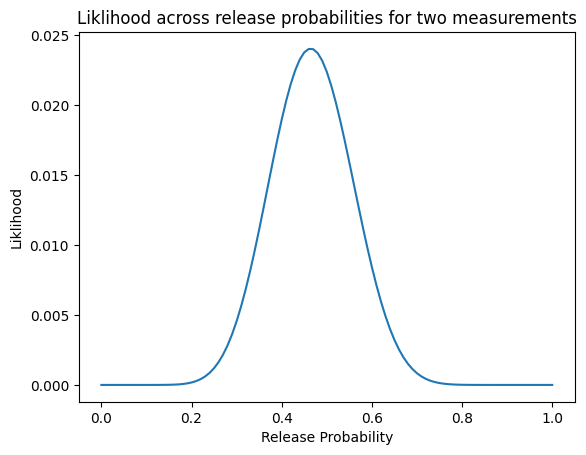

In [8]:
# now with increased resolution of 0.01
p_high_res = [i * 0.01 for i in range(101)]# vector of probability of sucess at increments of 0.01
Prob= [] # create an empty list for appending probabiloties for each probability
# for loop that goes from p=0.0 to p=1 in 0.01 increments and calculates the Binomial probability for the fixed quantal relase of 8
for i in range(len(p_high_res)):
  p_cur = p_high_res[i]
  prob_cur = ((math.factorial(n))/(math.factorial(k1)* (math.factorial(n-k1)))) * (p_cur**k1) * (1-p_cur)**(n-k1)
  Prob.append(prob_cur)

  # print("The probability of getting 8 quanta relased for probability of relase %0.2f number of quanta is %0.8f" % (p_cur, prob_cur))
# print("\n")

k2 = 5 #constant 5 quanta being released
# for loop that goes from p=0.0 to p=1 and calculate the Binomial probability for the fixed quantal relase of 5
Prob2= [] # create an empty list for appending probabiloties for each probability
# for loop that goes from p=0.0 to p=1 and calculate the Binomial probability for the fixed quantal relase of 5
for i in range(len(p_high_res)):
  p_cur = p_high_res[i]
  prob_cur = ((math.factorial(n))/(math.factorial(k2)* (math.factorial(n-k2)))) * (p_cur**k2) * (1-p_cur)**(n-k2)
  Prob2.append(prob_cur)
  # print("The probability of getting 5 quanta relased for probability of relase %0.2f number of quanta is %0.8f" % (p_cur, prob_cur))
# print("\n")

# multiply both probability lists (prob of 8 release by prob of 5 release)
total_prob = list(np.multiply(Prob, Prob2))
print(total_prob)
# for i in range(len(p_high_res)):
  # print("The total likelihood given both independent measurments, both with probability of release  %0.2f is %0.8f" % (p_high_res[i], total_prob[i]))
# print("\n")
plt.plot(p_high_res,total_prob)
plt.xlabel('Release Probability')
plt.ylabel('Liklihood')
plt.title('Liklihood across release probabilities for two measurements')

# display the maximal value
max_value = max(total_prob)
print("the maximum value is %0.8f" % (max_value))
print("\n")

# take the natual log of each probability for the rlease of 5 and 8 on the list and sum both logs for each probability
Prob_array = array("f", Prob) #convert list to array to be able to take the log later
Prob2_array = array("f", Prob2) #convert list to array to take the log later
Log_prob = np.log(Prob_array) #take the natural log from each elemnt in array "Prob"
Log_prob2 = np.log(Prob2_array) #take the natural log from each elemnt in array "Prob2"
# print(Log_prob, Log_prob2)
Log_like_prob = np.add(Log_prob, Log_prob2) #add each element on both log lists to it's corresponding element
# print(Log_like_prob)
# print log liklehood for each probability using log and addition of each independent measurment
# for i in range(len(p_high_res)):
  # print("The total log likelihood given both independent measurments, both with probability of release  %0.2f is %0.8f" % (p_high_res[i], Log_like_prob[i]))
# print("\n")


Answer: As seen in both grpahs, the first one being at a resolution of 0.1, the sceond at 0.01, we get a much "smoother" graph with the higher resolution, provided by a higher degree of freedom and more data points. The maximum value is higher for the higher resolution (likelihood of 0.02403132), whereas with the lower resolution we only got a value of 0.02239647

## Exercise 4

You keep going and conduct 100 separate experiments and end up with these results:

Measured releases	| Count
---------------- | -------
0 | 0
1 | 0
2 | 3
4 | 10
5 | 19
6 | 26
7 | 16
8 | 16
9 | 5
10 | 5
11 | 0
12 | 0
13 | 0
14 | 0

What is the most likely value of *p* (which we typically refer to as $\hat{p}$, which is pronounced as "p-hat" and represents the maximum-likelihood estimate of a parameter in the population given our sample with a resolution of 0.01?

BONUS: Use a fitting procedure to find $\hat{p}$.

[0.0, 5.247968051388354e-07, 2.330466561504704e-05, 0.00018349918464723332, 0.0007099839226161942, 0.00185777876042467, 0.0037899581018838576, 0.006502772568022135, 0.009818064555932862, 0.013429794188460416, 0.016976748573479382, 0.02011502270538945, 0.02257292562603428, 0.02418117416531041, 0.02487921285850683, 0.024703191042601026, 0.023762841493728124, 0.02221411576418075, 0.02023288874158613, 0.017993119417578557, 0.015651057343931834, 0.013335682030044298, 0.011144637806427528, 0.009144443886574484, 0.007373623342871972, 0.005847493006821242, 0.004563585327008066, 0.003506951229341841, 0.0026548637435019787, 0.00198067271180275, 0.0014567369821638237, 0.0010564807944531207, 0.0007556921385893942, 0.0005332129806902402, 0.000371175548284233, 0.00025492550142372066, 0.00017275007515525889, 0.0001155032758590327, 7.619501845860464e-05, 4.958906040391515e-05, 3.183678017463626e-05, 2.0160427469986204e-05, 1.2590056747413107e-05, 7.752284717829453e-06, 4.705537167353642e-06, 2.8148553

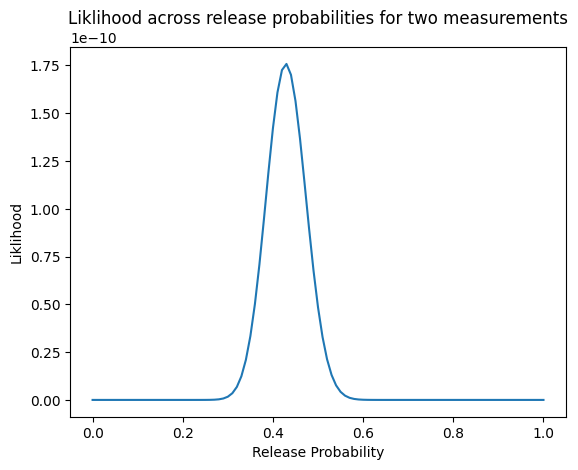

In [9]:
measured_releases = list(range(2,11,1)) #make list of mesured releases
#print(measured_releases)
count = [3, 2, 10, 19, 26, 16, 16, 5, 5] #make list of counts for each measured release

n = 14 # number of quanta available per experiment

p_high_res = [i * 0.01 for i in range(101)]# vector of probability of sucess at increments of 0.01
Prob_master= [None]*9 # create an empty master list of lists for appending probabiloties for each probability
# for loop that goes from p=0.0 to p=1 in 0.01 increments and calculates the Binomial probability for the each observed quantal relase of (length of measured release)
for i in range(0,len(measured_releases)):
  k = measured_releases[i] #changing observed quanta released from 2 to 10 with actual counts

  Prob = [] #create an empty list which will contain all 100 probabilities for a given k value
  #for loop to go through each value of 0 to 1 in 0.01 increments and generate a list with 101 values for that i quntal release (2 to 10)
  for m in range(0,len(p_high_res)):
    p_cur = p_high_res[m]
    prob_cur = ((math.factorial(n))/(math.factorial(k)* (math.factorial(n-k)))) * (p_cur**k) * (1-p_cur)**(n-k)
    Prob.append(prob_cur)

# placing the resulting list in a master list of lists, for which the number of quantal releases is also the index i the loop is going through
  Prob_master[i] = Prob
#now I've created a list of lists, in which each list in the index of i corresponds to the list of probabilities for quantal release of i (also =k, aka every value from 2 to 10)

#now we want to raise each list to the power of the counts for that quantal release (using the list "counts"), assuming matching indeces
for b in range(0, len(Prob_master)):
  total_quant_prob = list(np.power(Prob_master[b], count[b]))
  print(total_quant_prob)
# the result printed should be 9 lists, which is the result of each list for each quanta counted from 2 to 10, raised to the power of how many counts were observed for it, this is the first step of multiplying all the lists by each other

#the next step is multilying the resulting 9 lists by each other, which will calculate the added probability of all 100 trials (second step of multiplying all lists by each other)
 #generate a growing list of the probabilities all multiplied, containing only the first list of 9 to begin with
list_multiples = Prob_master[0]
for g in range(0, len(Prob_master)-1): #run list for length of 9 lists minus one because of g+1 below
  list_multiples = list(np.multiply(list_multiples,Prob_master[g+1] )) #multiply current list by next and assign to variable list_multiples

print("final list of probabilities for each increment of p values 0 to 1 with 0.01 increments")
print(list_multiples) #check
print(len(list_multiples))
Final_list = list_multiples

plt.plot(p_high_res,Final_list)
plt.xlabel('Release Probability')
plt.ylabel('Liklihood')
plt.title('Liklihood across release probabilities for two measurements')

#find maximum value p across these lists of lists and give it's index
maximum_value = max(Final_list)
print("the maximum value is %0.100f" % (maximum_value))
print("\n")

#find the index of the max value:
index_max_value = Final_list.index(maximum_value)
print("index number of the maximum value", index_max_value) #find the index number in the final list
index_max_value_p_high_res = p_high_res[index_max_value] # find the value of that index number in our list of 101 incremental probabilities
print("maximum P value", index_max_value_p_high_res)

## Exercise 5

Let's say that you have run an exhaustive set of experiments on this synapse and have determined that the true release probability is 0.3 (within some very small tolerance). Now you want to test whether changing the temperature of the preparation affects the release probability. So you change the temperature, perform the experiment, and measure 7 quantal events for the same 14 available quanta. Compute $\hat{p}$. Standard statistical inference now asks the question, what is the probability that you would have obtained that measurement given a Null Hypothesis of no effect? In this case, no effect corresponds to an unchanged value of the true release probability (i.e., its value remained at 0.3 even with the temperature change). What is the probability that you would have gotten that measurement if your Null Hypothesis were true? Can you conclude that temperature had an effect?

In [19]:
p_high_res = [i * 0.01 for i in range(101)]# vector of probability of sucess at increments of 0.01
n = 14 # number of quanta available per experiment
k3 = 7 #constant 8 quanta being released
Prob= [] # create an empty list for appending probabiloties for each probability
# for loop that goes from p=0.0 to p=1 in 0.01 increments and calculates the Binomial probability for the fixed quantal relase of 8
for i in range(len(p_high_res)):
  p_cur = p_high_res[i]
  prob_cur = ((math.factorial(n))/(math.factorial(k3)* (math.factorial(n-k3)))) * (p_cur**k3) * (1-p_cur)**(n-k3)
  Prob.append(prob_cur)

  # print("The probability of getting 7 quanta relased for probability of relase %0.2f number of quanta is %0.8f" % (p_cur, prob_cur))
print("\n")

# display the maximal value of likelihood
max_value = max(Prob)
print("the maximum value is %0.8f" % (max_value))
print("\n")
#find the index of that max value:
index_max_value = Prob.index(max_value)
print("index number of the maximum value", index_max_value) #find the index number in the final list
index_max_value_p_high_res = p_high_res[index_max_value] # find the value of that index number in our list of 101 incremental probabilities
print("maximum P value, or P hat", index_max_value_p_high_res)



the maximum value is 0.20947266


index number of the maximum value 50
maximum P value, or P hat 0.5


The null hypothesis is that the release probability is p=0.3
The alternative hypothesis is that the probaility of release is different from 0.3. We need to determine whether the observed results (7 out of 14) with a probability of release of 0.5 are significantly different from what would be expected under the null hypothesis (a 0.3 release probability).

In [28]:
## this answer was written using a script given by ChatGPT using the prompt:
## "given one trial of 7 out of total 14 quantal releases from an axon, with an probability of 0.3 and a p hat of 0.5, which function in python can compute if the null hypothesis is true? "
import scipy.stats as stats
# Perform the binomial test
p_value = stats.binom_test(k3, 14, 0.3, alternative='two-sided') #p_value = stats.binom_test(observed_successes, total_trials, null_probability, alternative='two-sided')

# Check if the p-value is less than the significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference.")
    print(p_value)
else:
    print("Fail to reject the null hypothesis: The result is not significantly different.")
    print(p_value)
    print("We cannot conclude that tempreature has an effect on release probability")



Fail to reject the null hypothesis: The result is not significantly different.
0.14075750626218989
We cannot conclude that tempreature has an effect on release probability


<ipython-input-28-00c5c0caba52>:5: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value = stats.binom_test(k3, 14, 0.3, alternative='two-sided') #p_value = stats.binom_test(observed_successes, total_trials, null_probability, alternative='two-sided')


## Bonus Exercise

These data are reproduced from Tables 1 and 2 of Johnson and Wernig. Note that *nx* indicates the number of trials ("release events") with *x* measured events. Each row is a separate experiment (don't worry about the ordering, which here is reproduced as it is in the paper).

Temp (°C)	| n0	| n1	| n2	| n3	| n4	| n5+
--- | --| --- | --- | --- | --- | ---
4.0	| 615	| 206	| 33	| 2	| 0	| 0
3.5	| 604	| 339	| 94	| 11	| 2	| 0
0.0 | 	332	| 126	| 21	| 1	| 0	| 0
2.0	| 573	| 443	| 154	| 28	| 2	| 0
6.5	| 172	| 176	| 89	| 12	| 1	| 0
3.0	| 80	| 224	| 200	| 32	| 4	| 0

You can probably already see that some experiments resulted in primarily zero or one events per trial (e.g., the top experiment), whereas others tended to have more events (e.g., the bottom experiment).

Do the quantal event numbers follow a binomial distribution? If so, then that would lend support to the idea that the events are generated by a process that can be characterized in terms of the number of available quanta and the average probability of release of each quantum.

Provide a qualitative answer to this question by comparing the empirical distributions (see the data table, above) to the predicted binomial distribution. To get the predicted distribution (i.e., the probabilities associated with each value of *k* from Eq. 1, given the release probability p and the number of available quanta *n*), you need to determine both *k* and *n* from the empirical measurements. To determine *p*, use Eq. 5 in the paper: $p=1-\frac{\sigma ^{2}}{m}$

where $\sigma ^{2}$ is the variance and *m* is the mean of the trial-by-trial counts that can be determined from the data. To determine *n*, compute *m*/*p* (because *m* = *n* x *p*).

As an added bonus, also include the predicted Poisson distribution, which can be computed using only the mean number of events (*m*, described above).



# Additional Resources

Working with the binomial distribution in [Matlab](https://www.mathworks.com/help/stats/binomial-distribution.html), [R](https://www.rdocumentation.org/packages/stats/versions/3.3/topics/Binomial), and [Python](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html).

# Credits

Copyright 2021 by Joshua I. Gold, University of Pennsylvania